In [237]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [238]:
# loading the data
df = pd.read_csv(r"traces_data.csv",index_col = False)

In [239]:
# remove special character
df.columns = df.columns.str.replace(' ', '') 

In [240]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [241]:
# checking data types of data
df.dtypes

Timestamp       object
traceID         object
spanID          object
parentSpanID    object
serviceName     object
Name            object
durationNano     int64
dtype: object

In [242]:
# shape of data
df.shape

(183615, 7)

In [243]:
# changing datatype of 'Time stamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [244]:
# renaming columns as name of some columns have a special character
df.rename(columns={' durationNano': 'durationNano',' traceID':'traceID',' spanID':'spanID',' parentSpanID':'parentSpanID',' serviceName':'serviceName',' Name':'Name'}, inplace=True)

In [245]:
# Checking statistical parameter of data
df.describe()

,Timestamp,durationNano
count,183615,1.836150e+05
mean,2023-11-23 03:28:13.200504576,5.414918e+06
min,2023-11-23 02:34:48.848999936,0.000000e+00
25%,2023-11-23 03:00:04.527859200,3.357000e+05
50%,2023-11-23 03:27:33.628999936,1.584906e+06
75%,2023-11-23 03:55:31.771000064,6.832718e+06
max,2023-11-23 04:59:36.766831067,4.999858e+09
std,NaN,2.077879e+07


In [246]:
# checking statistical parameter of data of columns having datatype as object
df.describe(include = 'object')

,traceID,spanID,parentSpanID,serviceName,Name
count,183615,183615,141834,183615,183615
unique,41792,183615,107233,17,66
top,1f2fae8467906870310cea93db646b1b,0d87dcf5ea5aeaab,d1783a9be93930b7,frontend,HTTP GET
freq,62,1,59,65758,41311


In [247]:
# checking null values in the dataset
df.isnull().sum()

Timestamp           0
traceID             0
spanID              0
parentSpanID    41781
serviceName         0
Name                0
durationNano        0
dtype: int64

In [248]:
# percentage of null values 
round(df.isnull().sum()*100/df.shape[0],2)

Timestamp        0.00
traceID          0.00
spanID           0.00
parentSpanID    22.75
serviceName      0.00
Name             0.00
durationNano     0.00
dtype: float64

In [249]:
# As per above parentspanID have 22.75% of null data filling it with the mode of the column
mode_value = df['parentSpanID'].mode()[0]
mode_value
df['parentSpanID'] = df['parentSpanID'].fillna(mode_value)

In [250]:
# checking null values again for confirmation that there is no null values left
df.isnull().sum()

Timestamp       0
traceID         0
spanID          0
parentSpanID    0
serviceName     0
Name            0
durationNano    0
dtype: int64

In [251]:
# checking duplicates in dataset
df.duplicated().sum()

0

In [252]:
# finding unique values in name column
df['Name'].unique()

array(['/', 'featureflagservice.repo.query:featureflags', 'ingress',
       'fs realpathSync', 'fs readFileSync', 'fs statSync', 'HTTP GET',
       'oteldemo.ProductCatalogService/GetProduct', 'HTTP POST',
       '/oteldemo.RecommendationService/ListRecommendations',
       'get_product_list', '/oteldemo.FeatureFlagService/GetFlag',
       '/oteldemo.ProductCatalogService/ListProducts',
       'oteldemo.CartService/AddItem',
       'oteldemo.ProductCatalogService/ListProducts', 'HGET', 'HMSET',
       'EXPIRE', 'grpc.oteldemo.CartService/GetCart',
       'oteldemo.CartService/GetCart',
       'grpc.oteldemo.ProductCatalogService/GetProduct',
       'oteldemo.FeatureFlagService/GetFlag',
       'grpc.oteldemo.CartService/AddItem',
       'grpc.oteldemo.CheckoutService/PlaceOrder', 'dns.lookup',
       'tcp.connect', 'oteldemo.CheckoutService/PlaceOrder',
       'prepareOrderItemsAndShippingQuoteFromCart',
       'oteldemo.CurrencyService/Convert', 'CurrencyService/Convert',
       'otel

In [253]:
# removing special character / from Name column
df['Name'] = df['Name'].str.replace('/', '')

In [254]:
# Counting frquency of distinct Names
df['Name'].value_counts()

Name
HTTP GET                                         41311
oteldemo.ProductCatalogServiceGetProduct         19453
grpc.oteldemo.ProductCatalogServiceGetProduct    15741
HTTP POST                                        12938
HGET                                              8440
                                                 ...  
dns.lookup                                           3
tcp.connect                                          3
documentLoad                                         2
fs existsSync                                        2
documentFetch                                        2
Name: count, Length: 64, dtype: int64

In [255]:
# Counting frquency of distinct serviceNames it says frontend have maximum service count while frontend-web have least
df['serviceName'].value_counts()

serviceName
frontend                 65758
cartservice              25834
productcatalogservice    20934
loadgenerator            16852
checkoutservice          13750
featureflagservice        7623
recommendationservice     6032
frontend-proxy            4836
emailservice              4016
adservice                 3523
paymentservice            3337
shippingservice           3012
quoteservice              3010
currencyservice           2860
accountingservice         1004
frauddetectionservice     1004
frontend-web               230
Name: count, dtype: int64

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

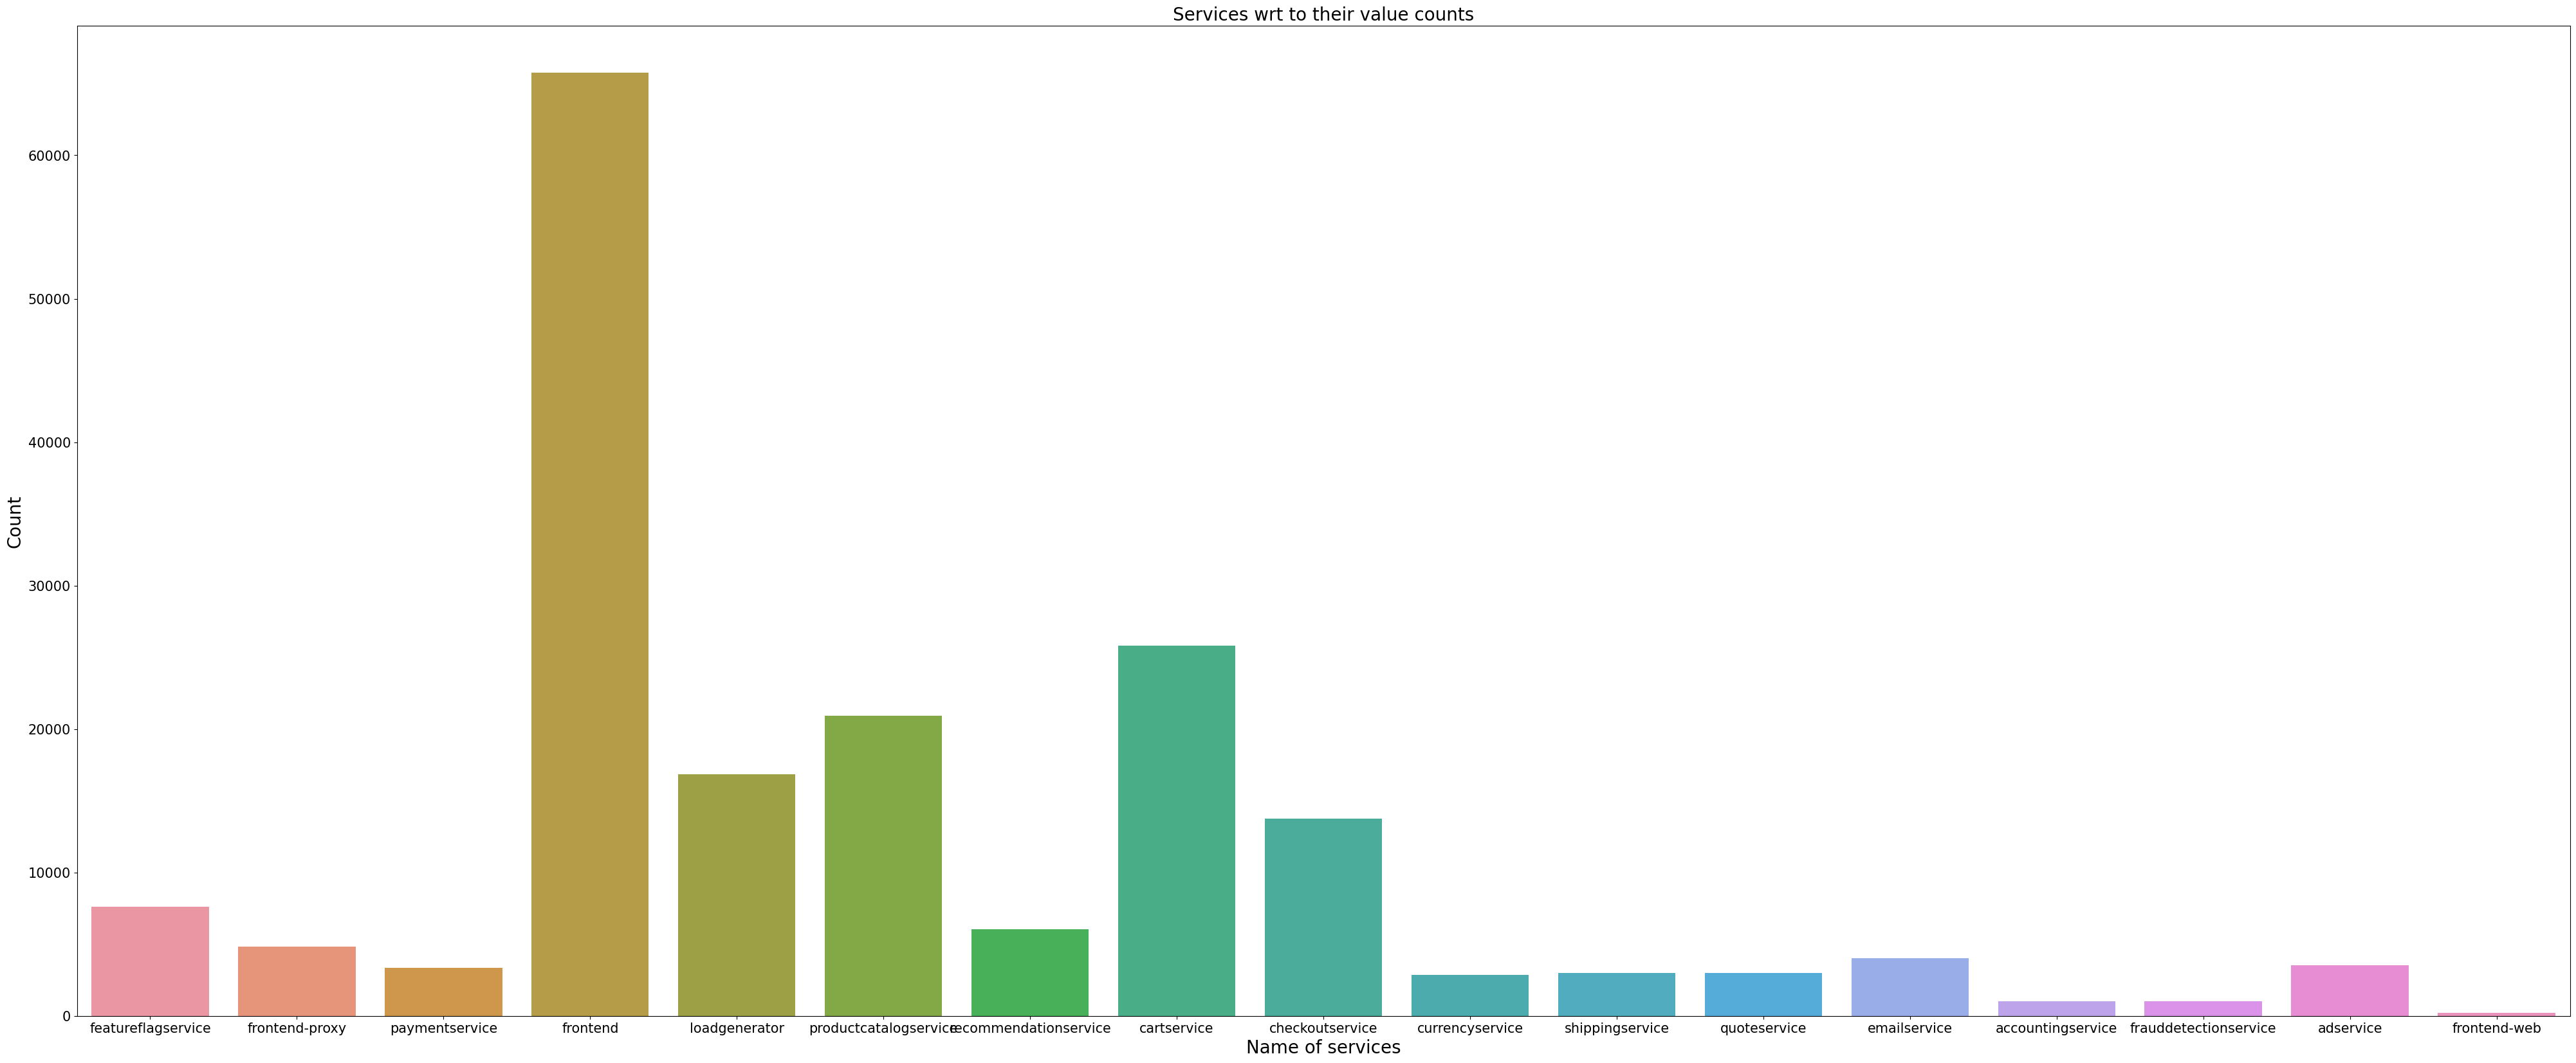

In [256]:
# plotting servicename wrt to count 
plt.figure(figsize = (50,20))
sns.countplot(x = df['serviceName'])
plt.xlabel('Name of services',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Services wrt to their value counts',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

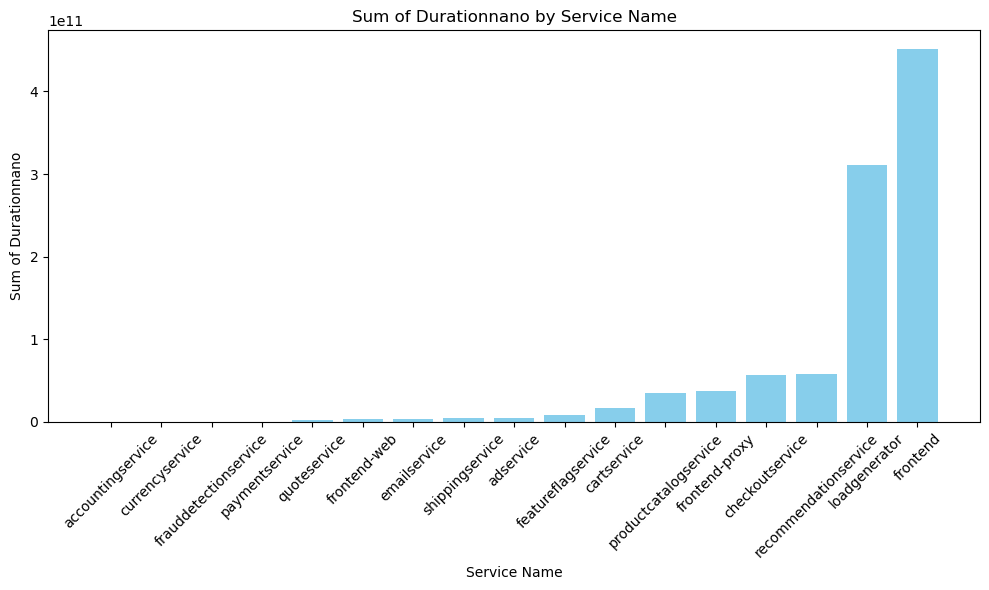

In [257]:
# Plotting the total sum of durataion against services shows frontend have max duration
grouped_df = df.groupby('serviceName')['durationNano'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='durationNano')
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['serviceName'], sorted_df['durationNano'], color='skyblue')
plt.xlabel('Service Name')
plt.ylabel('Sum of Durationnano')
plt.title('Sum of Durationnano by Service Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

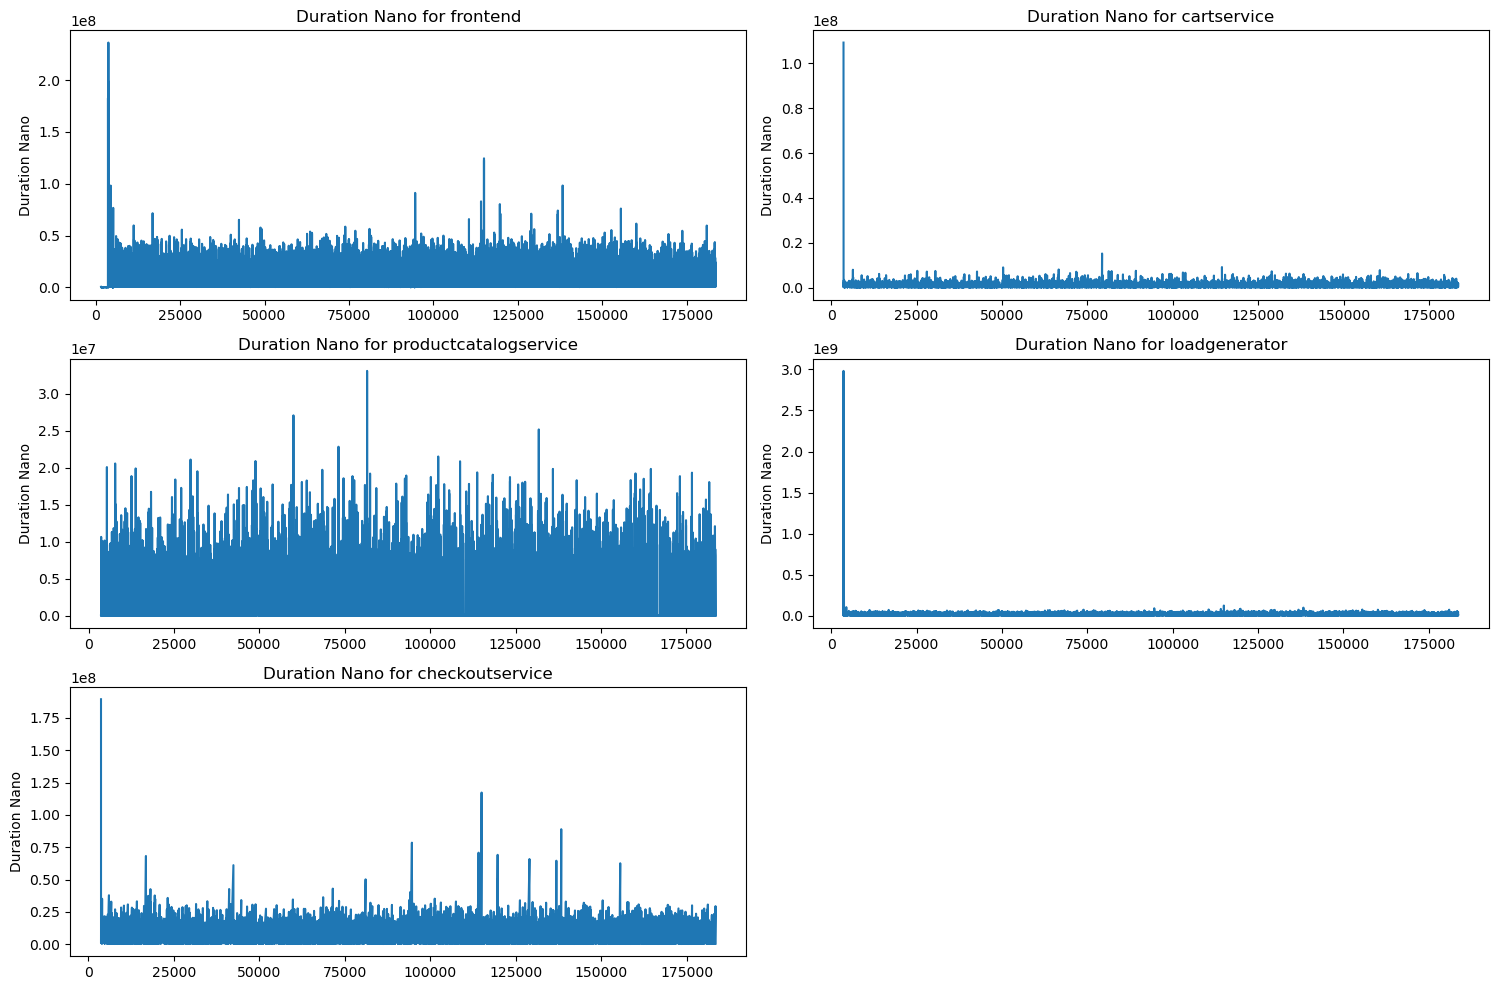

In [258]:
# Plotting top serviece namees wrt their duration to check the relationship but the graph there are few spikes but the duration is almost constant
top_services = df['serviceName'].value_counts().nlargest(5).index
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, service in enumerate(top_services, 1):
    plt.subplot(3, 2, i)
    service_data = df[df['serviceName'] == service]
    sns.lineplot(x=service_data.index, y=service_data['durationNano'])
    plt.ylabel('Duration Nano')
    plt.title(f"Duration Nano for {service}")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Duration(Nanoseconds)')

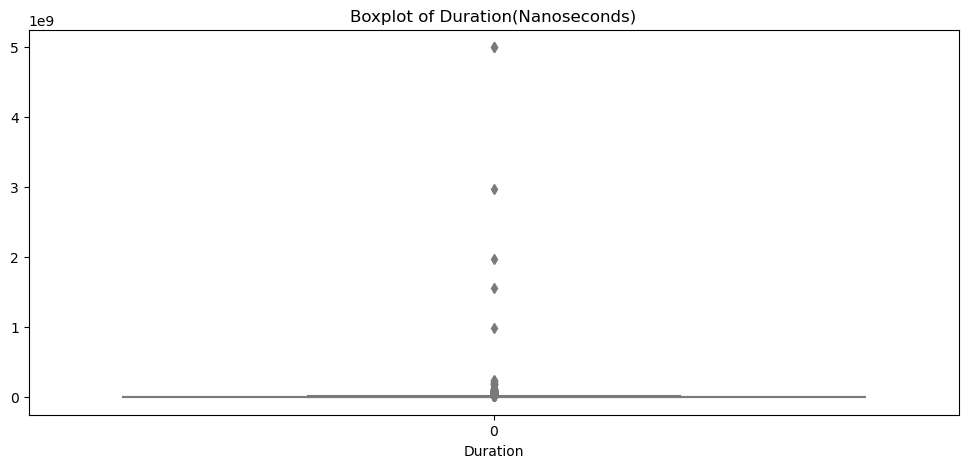

In [259]:
# Boxpltting nano second for checking any outliers in the data
plt.figure(figsize =(12,5))
sns.boxplot(df['durationNano'],palette='pastel')
plt.xlabel('Duration')
plt.title('Boxplot of Duration(Nanoseconds)')

In [260]:
# Counting shape of outliers using IQR and removing them as they around 10% of total data
Q1 = df['durationNano'].quantile(0.25)
Q3 = df['durationNano'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['durationNano'] < lower_bound) | (df['durationNano'] > upper_bound)]
df = df[(df['durationNano'] >= lower_bound) & (df['durationNano'] <= upper_bound)]
print("Shape of outliers:", outliers.shape)


Shape of outliers: (18848, 7)


Text(0.5, 1.0, 'Boxplot of Duration(Nanoseconds)')

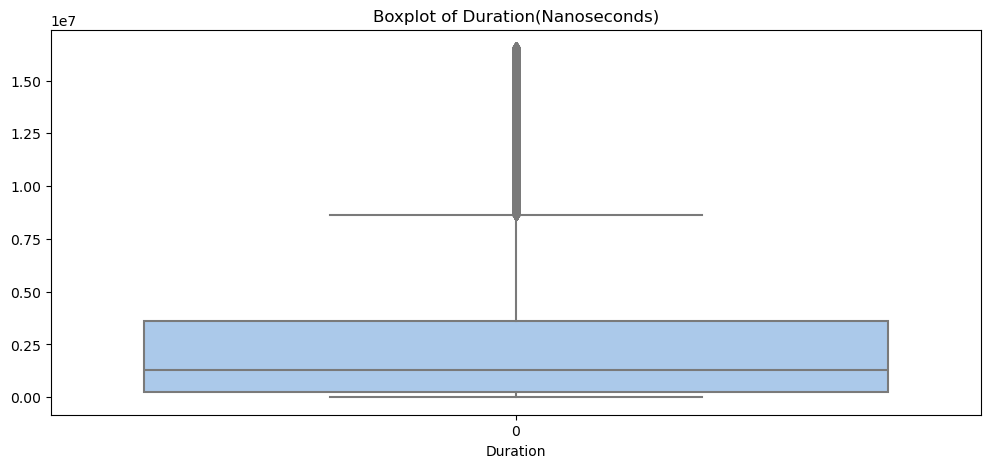

In [261]:
# Again plotting boxplot to see is there any outliers left in data
plt.figure(figsize =(12,5))
sns.boxplot(df['durationNano'],palette='pastel')
plt.xlabel('Duration')
plt.title('Boxplot of Duration(Nanoseconds)')

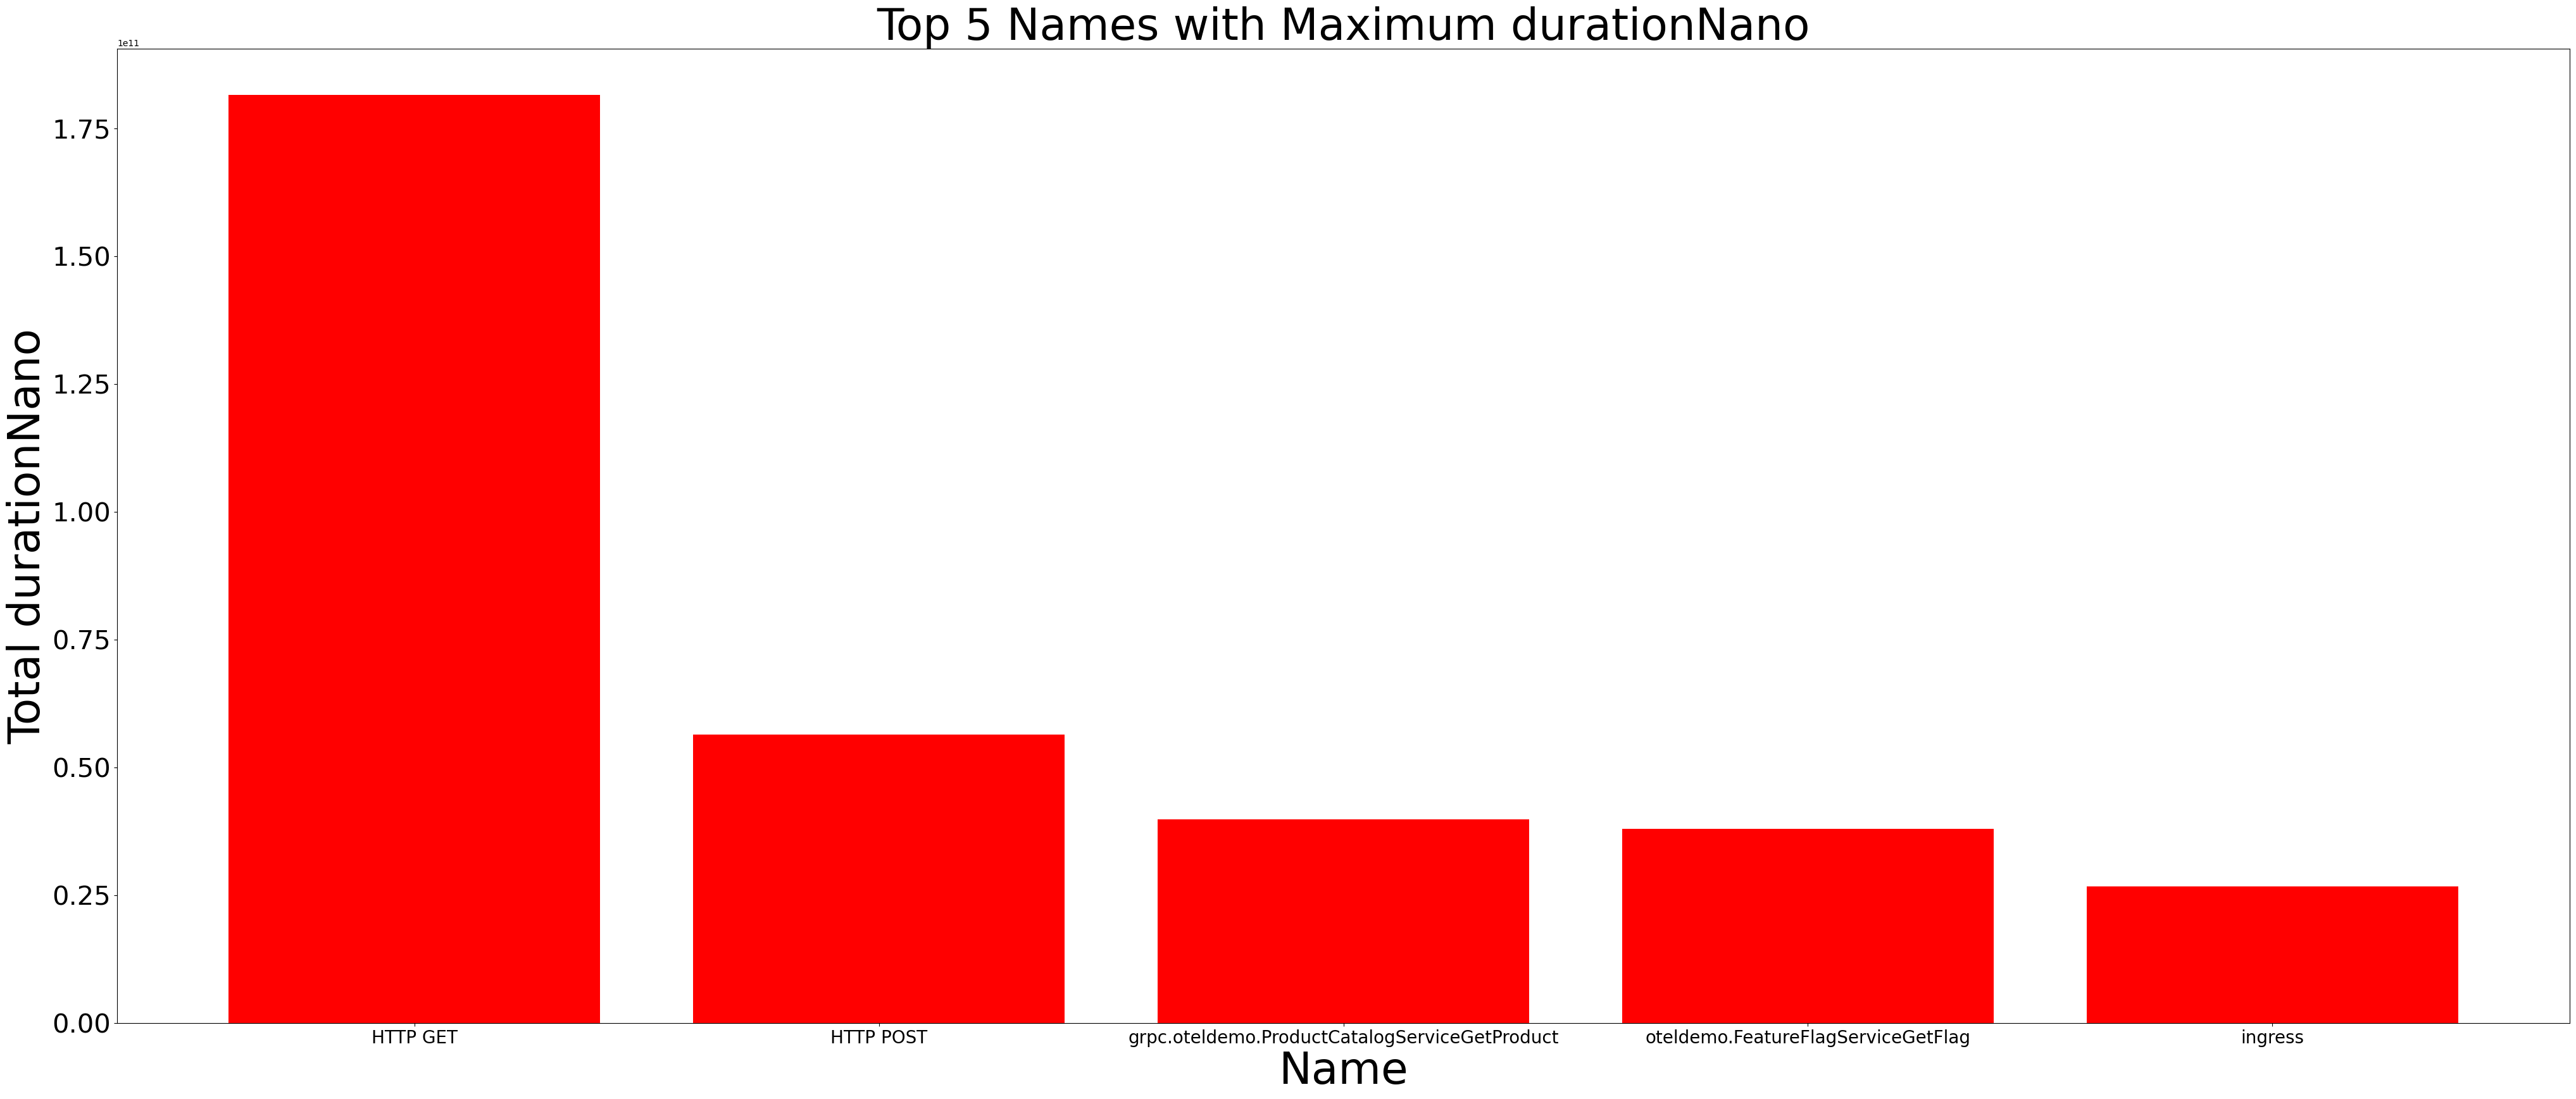

In [262]:
# Plotting top 5 method names having highest sum of durationNano 
grouped_df = df.groupby('Name')['durationNano'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='durationNano', ascending=False)
top_5_df = sorted_df.head(5)
plt.figure(figsize=(50, 20))
plt.bar(top_5_df['Name'], top_5_df['durationNano'], color='red')
plt.xlabel('Name',fontsize = 50)
plt.ylabel('Total durationNano',fontsize = 50)
plt.title('Top 5 Names with Maximum durationNano',fontsize = 50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
plt.show()

In [263]:
# Counting distinct values of traceID
df['traceID'].value_counts()

traceID
20bdaaceb78371a779fcf68177221440    61
d5f8b99248c2d38664363ff29589bd72    58
df3b7dfb87f204e0ca20ef25a2493bdf    58
1b2c4f69509ad823337ed8f176331e2b    58
47e52aa775baa2e126274a284c60b83f    58
                                    ..
75f9273996bd69606db7f422bdd8de60     1
c7520e728aec873d6d438ae1a45161ab     1
d5ccfa97fa767a411d9366074dfa6774     1
d8ae5c10a09397bddf7f1b23aaad7ab9     1
d5484574fe43ded5c03137a5aaa60d68     1
Name: count, Length: 39180, dtype: int64

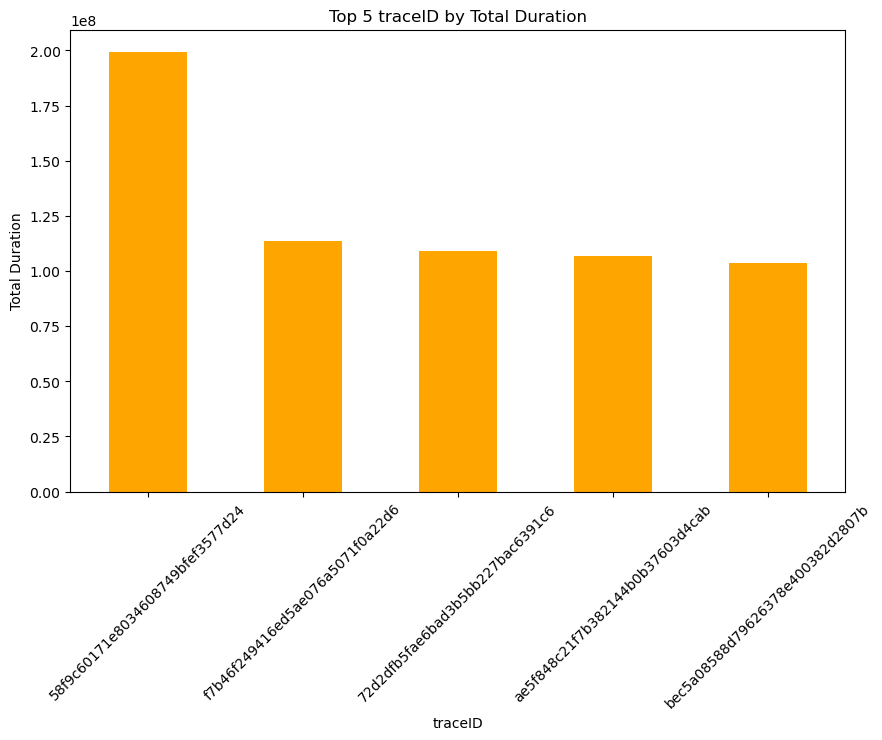

In [264]:
# Plotting top 5 traceIDs against total Sum of durationNao
traceID_duration_sum = df.groupby('traceID')['durationNano'].sum()
top_5_traceIDs = traceID_duration_sum.nlargest(5)
top_5_traceIDs
top_5_traceIDs.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 5 traceID by Total Duration')
plt.xlabel('traceID')
plt.ylabel('Total Duration')
plt.xticks(rotation=45)
plt.show()


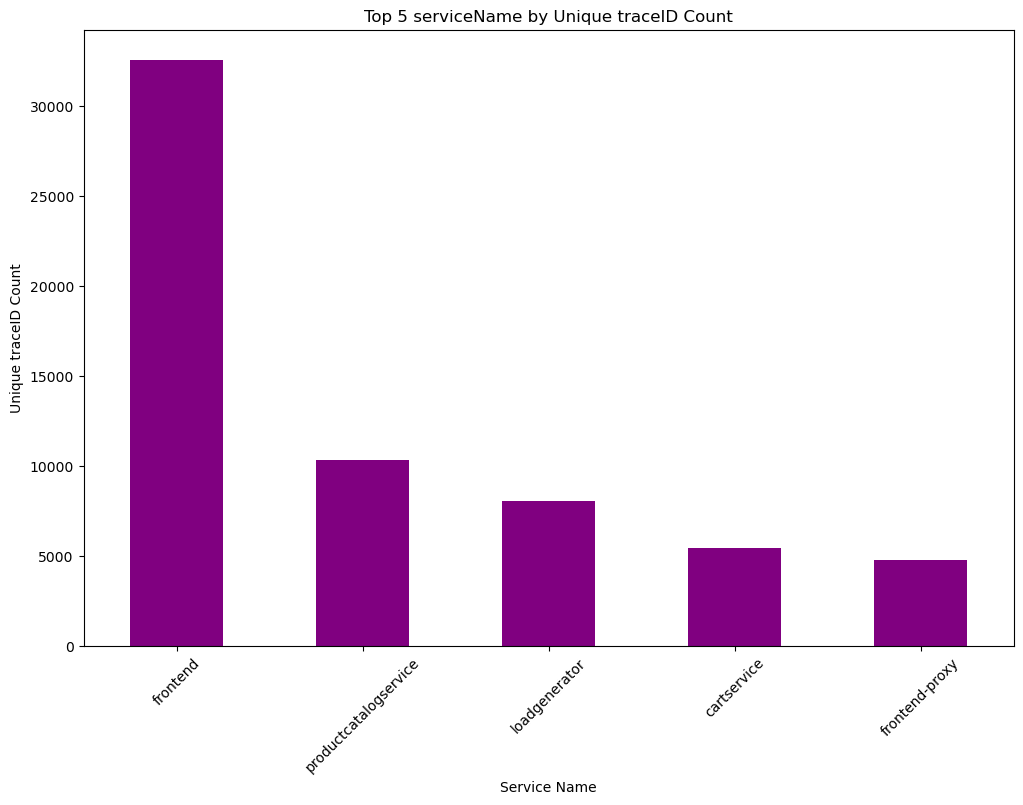

In [265]:
# Plotting top 5 services having maximum count of traceIDs
serviceName_traceID_count = df.groupby('serviceName')['traceID'].nunique()
top_5_serviceNames = serviceName_traceID_count.nlargest(5)
top_5_serviceNames.plot(kind='bar', figsize=(12, 8), color='purple')
plt.title('Top 5 serviceName by Unique traceID Count')
plt.xlabel('Service Name')
plt.ylabel('Unique traceID Count')
plt.xticks(rotation=45)
plt.show()

In [266]:
# Extracting hour,minute,second from the timestamp column since all the data belong to same date so we will not consider date
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second

Text(0, 0.5, ' Total count of services')

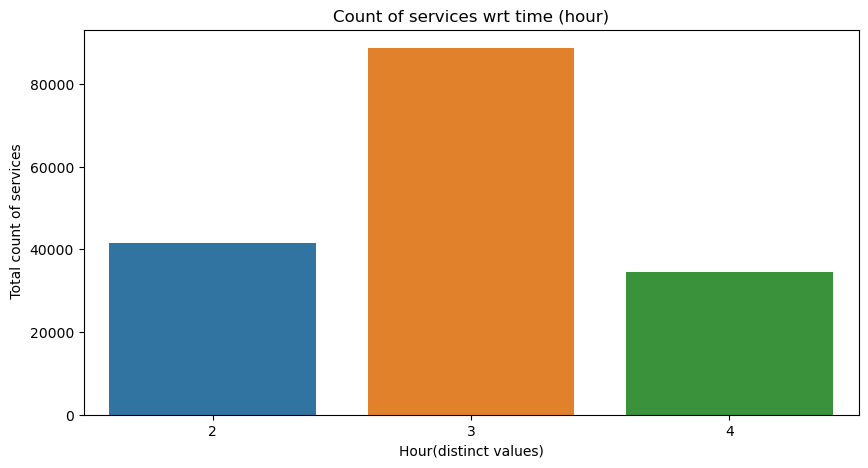

In [267]:
# plotting hour having maximum count of services shows at 3 we have the maximum serviecs
df_hour = df['hour'].value_counts().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data = df_hour, x= 'hour', y='count')
plt.title("Count of services wrt time (hour)")
plt.xlabel("Hour(distinct values)")
plt.ylabel(" Total count of services")

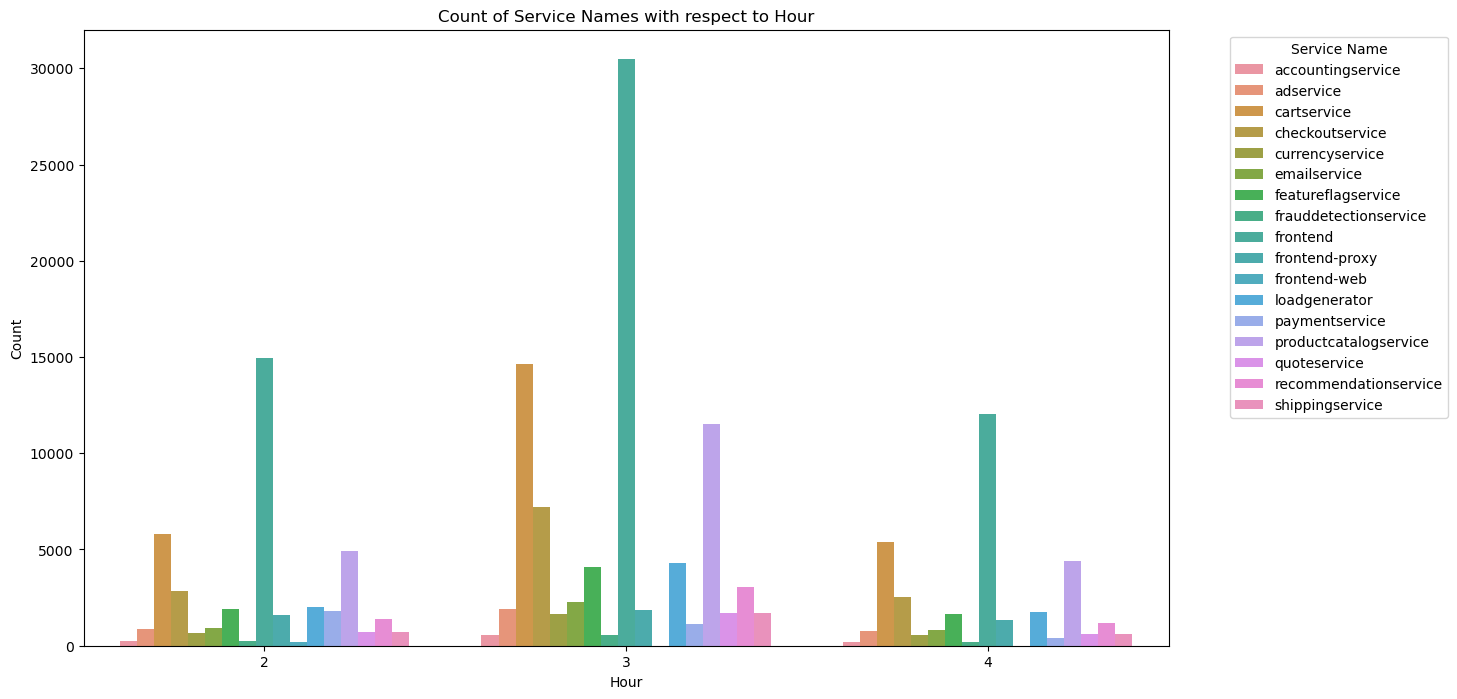

In [268]:
# Plotting services having maximum count in hour 2,3,4
service_count_by_hour = df.groupby(['hour', 'serviceName']).size().reset_index(name='count')
plt.figure(figsize=(14, 8))
sns.barplot(data=service_count_by_hour, x='hour', y='count', hue='serviceName')
plt.title('Count of Service Names with respect to Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0, 0.5, 'Total count of services')

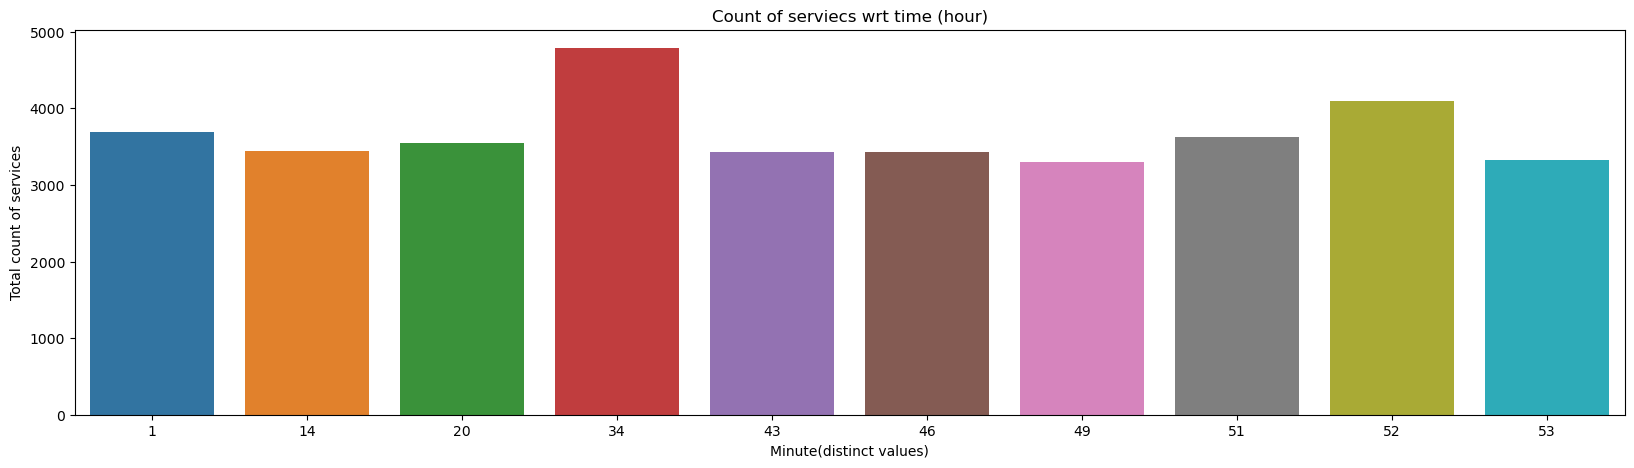

In [269]:
# Plotting count of services wrt to minute shows at 34 and 52 minutes of hour we have the most caes of services
df_minute = df['minute'].value_counts().reset_index().head(10)
plt.figure(figsize = (20,5))
sns.barplot(data = df_minute, x= 'minute', y='count')
plt.title("Count of serviecs wrt time (hour)")
plt.xlabel("Minute(distinct values)")
plt.ylabel("Total count of services")

In [270]:
# converting categorical column services into dummies
df = pd.get_dummies(df, columns=['serviceName'], prefix='serviceName')

In [271]:
# checking the shape of the dataframe
df.shape

(164767, 26)

In [272]:
# Checking datatypes of the new data
df.dtypes

Timestamp                            datetime64[ns]
traceID                                      object
spanID                                       object
parentSpanID                                 object
Name                                         object
durationNano                                  int64
hour                                          int32
minute                                        int32
second                                        int32
serviceName_accountingservice                  bool
serviceName_adservice                          bool
serviceName_cartservice                        bool
serviceName_checkoutservice                    bool
serviceName_currencyservice                    bool
serviceName_emailservice                       bool
serviceName_featureflagservice                 bool
serviceName_frauddetectionservice              bool
serviceName_frontend                           bool
serviceName_frontend-proxy                     bool
serviceName_

In [273]:
# converting bool data into int
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [274]:
df['Name'].nunique()

63

In [275]:
# Dropping time stamp,traceID,saonID ParentspanID as they dont have significance in data and Name because there are 63 unique values which can make our data more complex and also can cause overfitting of the data but if necessary we can use the column Name
df.drop(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'Name'],axis =1 ,inplace = True)

In [277]:
df.columns

Index(['durationNano', 'hour', 'minute', 'second',
       'serviceName_accountingservice', 'serviceName_adservice',
       'serviceName_cartservice', 'serviceName_checkoutservice',
       'serviceName_currencyservice', 'serviceName_emailservice',
       'serviceName_featureflagservice', 'serviceName_frauddetectionservice',
       'serviceName_frontend', 'serviceName_frontend-proxy',
       'serviceName_frontend-web', 'serviceName_loadgenerator',
       'serviceName_paymentservice', 'serviceName_productcatalogservice',
       'serviceName_quoteservice', 'serviceName_recommendationservice',
       'serviceName_shippingservice'],
      dtype='object')

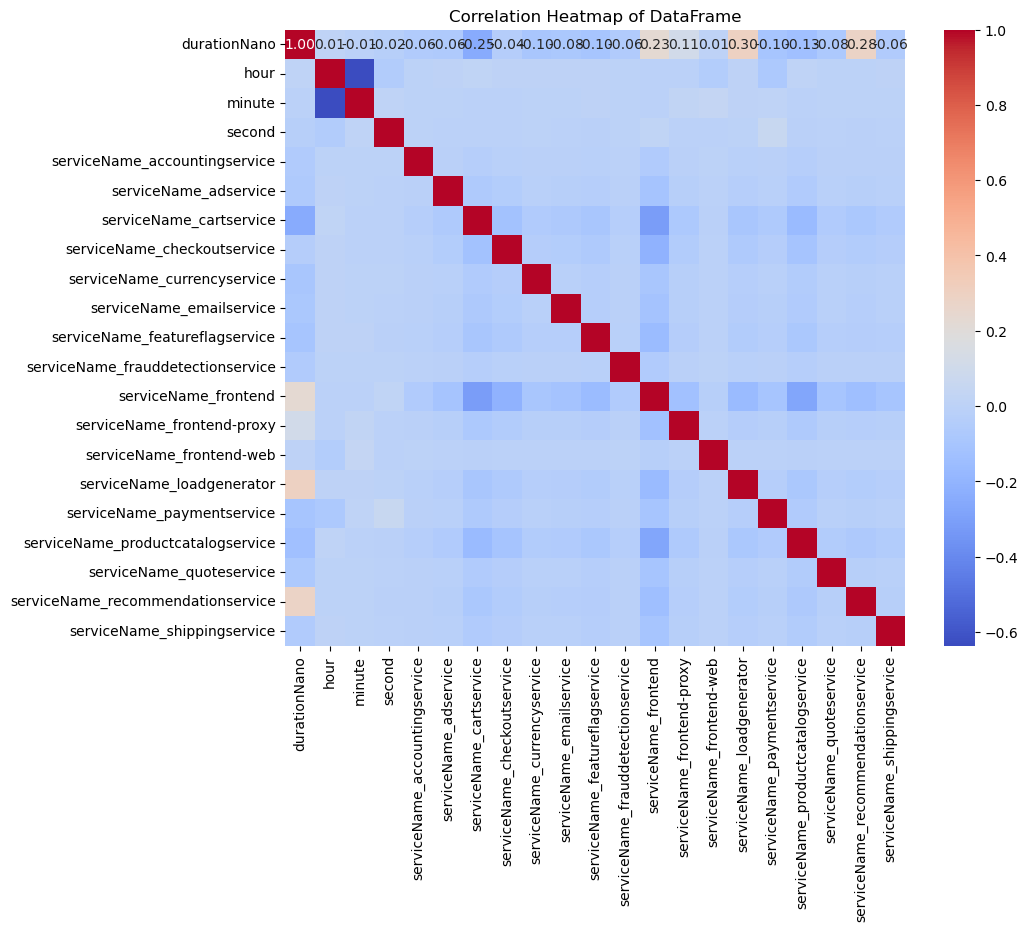

In [278]:
# Plotting heatmap to check correlation in dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()
# By lloking at the graph we can cloude that hour,minute and seconds doesn,t have much effect on our data.

So we can use multiple algorithms but i would like to go with xgboost
a) Xg Boost = Xg boost beacuse it combines multiple weak learner to form a strong predictor basically at each step anew model gets created and which tries to correct teh errors from the previous model.It is widely used model and we can tune it by using diffrent values of hyperparameters.In our case basically we will be predicting duration on the basis of given service name which is a regression task.Xgboost can handle imabalance in class as in our data different services have diiferent value counts which can lead to biasedness 